<a href="https://colab.research.google.com/github/mehmetsefaciftci/dsa210project/blob/main/notebook/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


name                    0
Year                    0
code_x                  0
Temperature             0
code_y                  0
Precipitation           0
Area harvested          0
Production              0
Yield                   0
Yield/Carcass Weight    0
dtype: int64


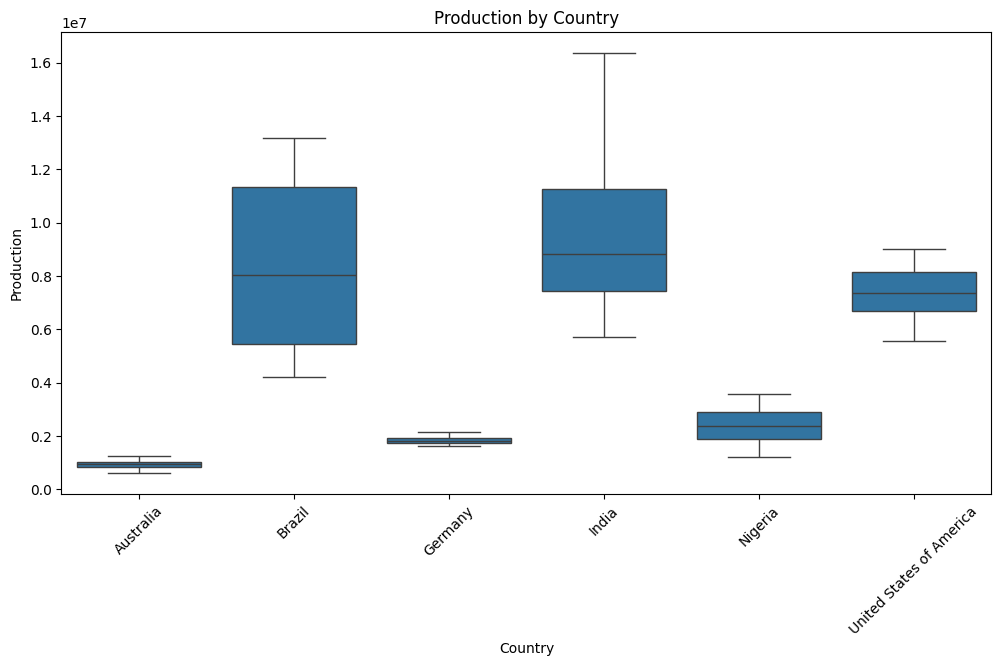

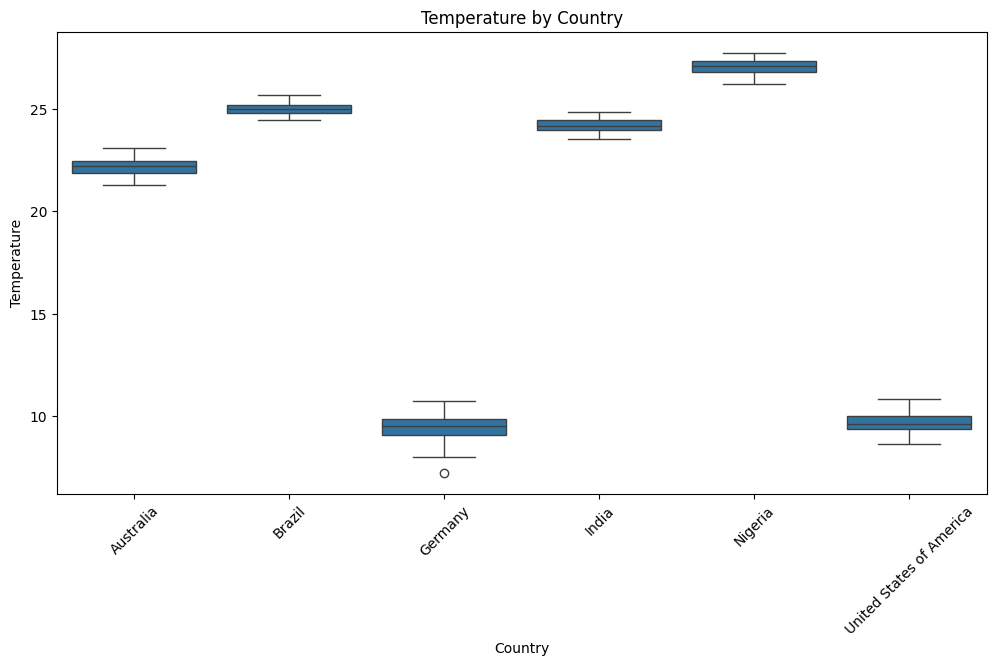

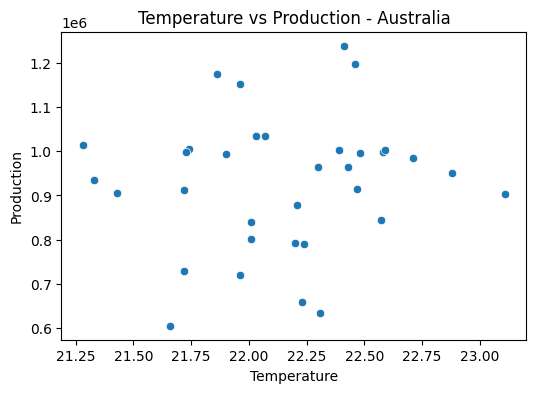

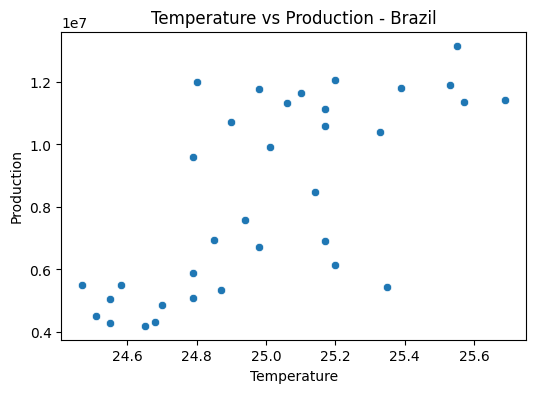

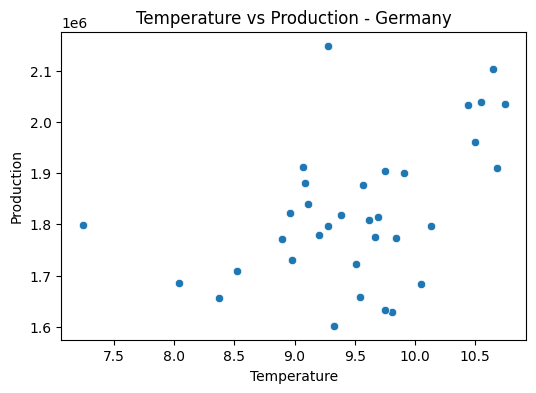

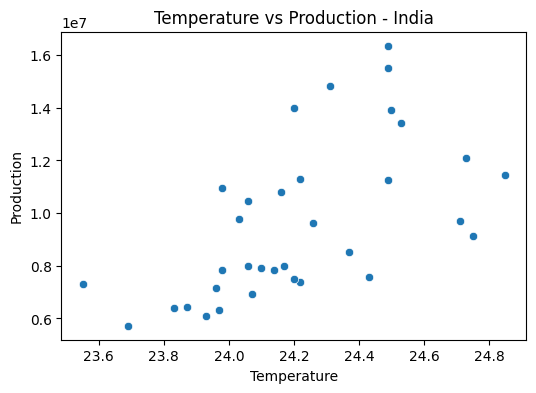

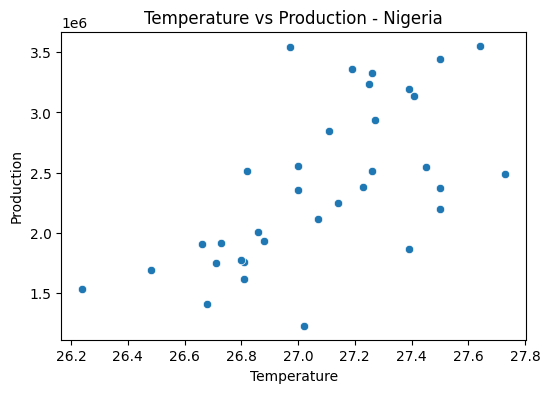

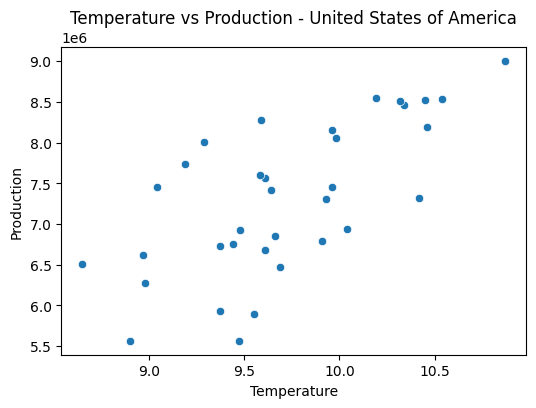

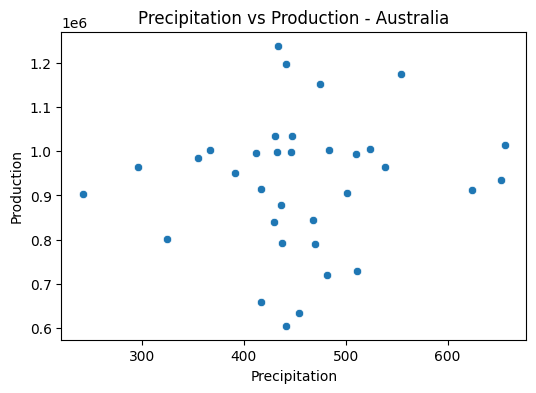

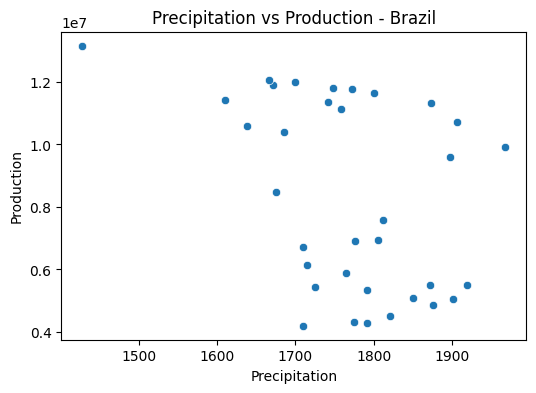

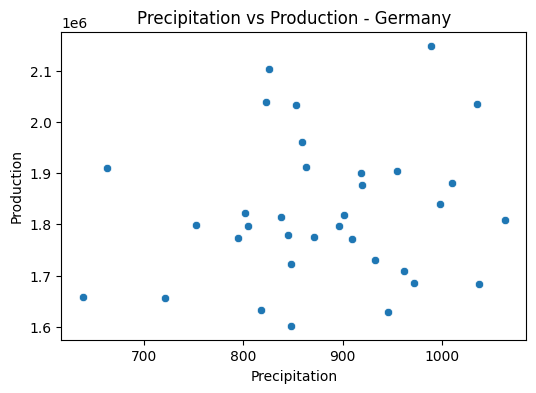

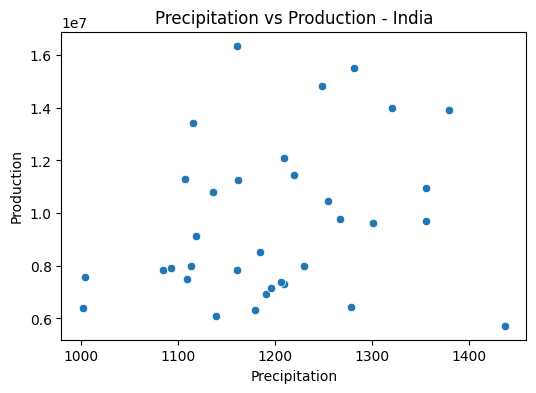

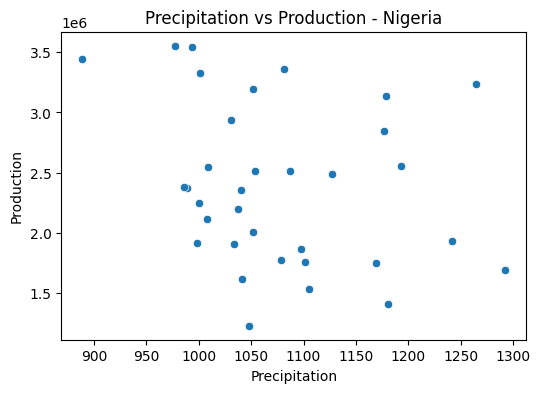

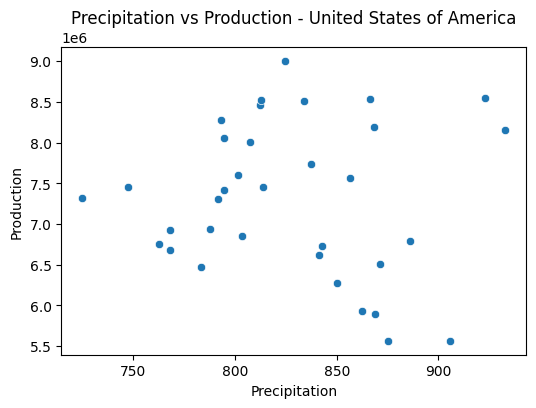

In [16]:
# 1. Kütüphaneler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Verileri yükle
df_temp = pd.read_excel('/content/6-ulke-temperature.xlsx')
df_precip = pd.read_excel('/content/6-ulke-precip.xlsx')
df_yield = pd.read_csv('/content/yield-area_harvested-product.csv')

# 3. Temperature uzun formata çevir
df_temp_long = pd.melt(df_temp, id_vars=['code', 'name'], var_name='Year', value_name='Temperature')
df_temp_long['Year'] = df_temp_long['Year'].str.slice(0,4).astype(int)

# 4. Precipitation uzun formata çevir
df_precip_long = pd.melt(df_precip, id_vars=['code', 'name'], var_name='Year', value_name='Precipitation')
df_precip_long['Year'] = df_precip_long['Year'].str.slice(0,4).astype(int)

# 5. Yield verisini uzun formata çevir
df_yield_filtered = df_yield[['Area', 'Element', 'Year', 'Value']].copy()
df_yield_filtered['Year'] = df_yield_filtered['Year'].astype(int)
df_yield_pivot = df_yield_filtered.pivot_table(index=['Area', 'Year'], columns='Element', values='Value').reset_index()
df_yield_pivot.rename(columns={'Area':'name'}, inplace=True)

# 6. Ortak index oluştur (ülke ve yıl tam kesişimi)
import itertools
countries = ['Australia', 'Brazil', 'Germany', 'India', 'Nigeria', 'United States of America']
years = sorted(df_temp_long['Year'].unique())
full_index = pd.DataFrame(list(itertools.product(countries, years)), columns=['name', 'Year'])

# 7. Her veri setini tam indexle birleştir
df_temp_full = pd.merge(full_index, df_temp_long, on=['name', 'Year'], how='left')
df_precip_full = pd.merge(full_index, df_precip_long, on=['name', 'Year'], how='left')
df_yield_full = pd.merge(full_index, df_yield_pivot, on=['name', 'Year'], how='left')

# 8. Tüm verileri birleştir
df_climate = pd.merge(df_temp_full, df_precip_full, on=['name', 'Year'], how='left')
df_final = pd.merge(df_climate, df_yield_full, on=['name', 'Year'], how='left')

# 9. Eksik değer kontrolü
print(df_final.isnull().sum())

# 10. Boxplot - Üretim (Production) ülkeler bazında
plt.figure(figsize=(12,6))
sns.boxplot(x='name', y='Production', data=df_final)
plt.title('Production by Country')
plt.xlabel('Country')
plt.ylabel('Production')
plt.xticks(rotation=45)
plt.show()

# 11. Boxplot - Sıcaklık (Temperature) ülkeler bazında
plt.figure(figsize=(12,6))
sns.boxplot(x='name', y='Temperature', data=df_final)
plt.title('Temperature by Country')
plt.xlabel('Country')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.show()

# 12. Scatterplot - Sıcaklık ve üretim ilişkisi, ülke bazında
for country in countries:
    df_c = df_final[df_final['name'] == country].dropna(subset=['Temperature', 'Production'])
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='Temperature', y='Production', data=df_c)
    plt.title(f'Temperature vs Production - {country}')
    plt.xlabel('Temperature')
    plt.ylabel('Production')
    plt.show()

# 13. Scatterplot - Yağış (Precipitation) ve üretim ilişkisi, ülke bazında
for country in countries:
    df_c = df_final[df_final['name'] == country].dropna(subset=['Precipitation', 'Production'])
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='Precipitation', y='Production', data=df_c)
    plt.title(f'Precipitation vs Production - {country}')
    plt.xlabel('Precipitation')
    plt.ylabel('Production')
    plt.show()


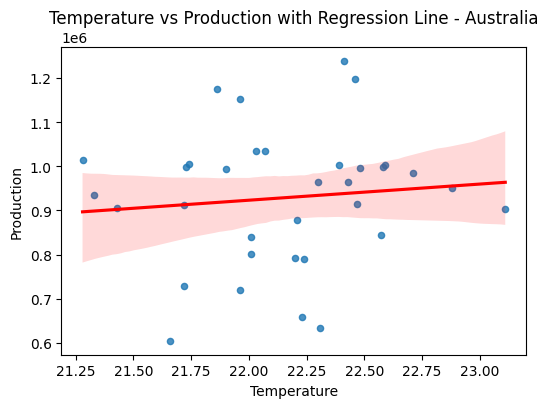

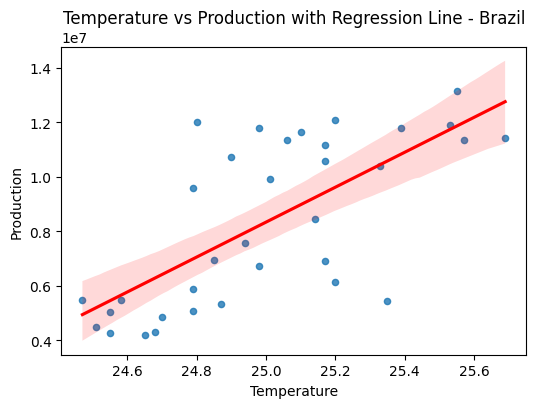

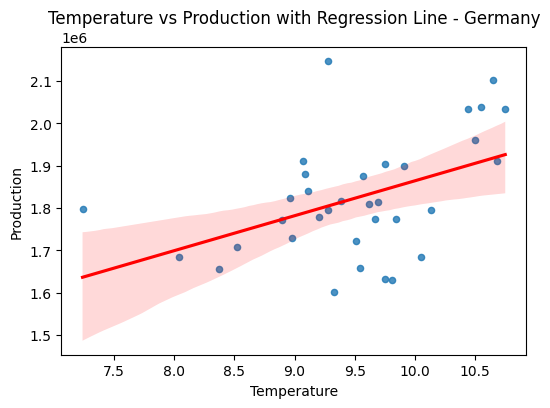

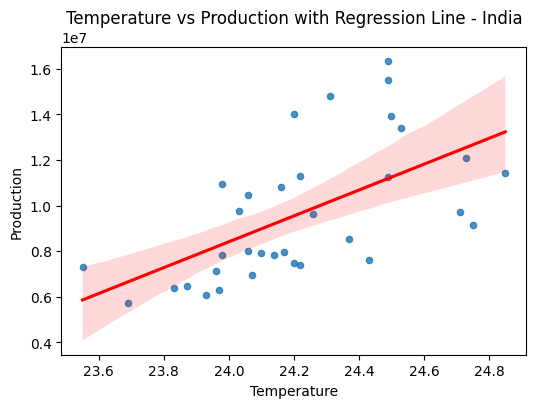

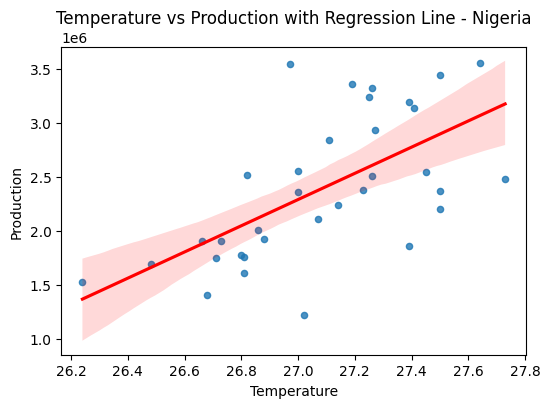

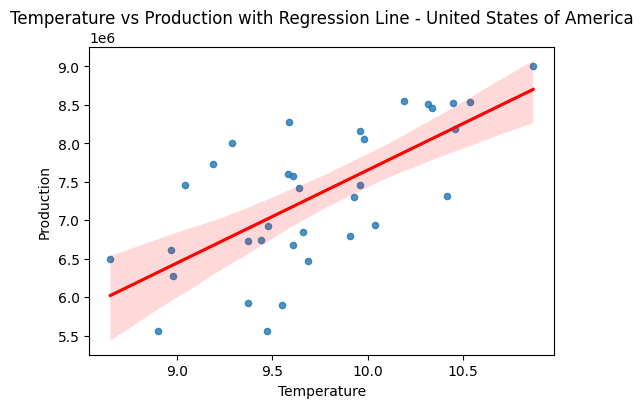

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

for country in countries:
    df_c = df_final[df_final['name'] == country].dropna(subset=['Temperature', 'Production'])
    plt.figure(figsize=(6,4))
    sns.regplot(x='Temperature', y='Production', data=df_c, scatter_kws={'s':20}, line_kws={"color":"red"})
    plt.title(f'Temperature vs Production with Regression Line - {country}')
    plt.xlabel('Temperature')
    plt.ylabel('Production')
    plt.show()


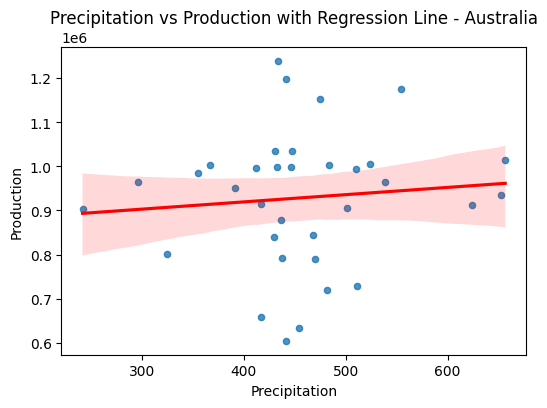

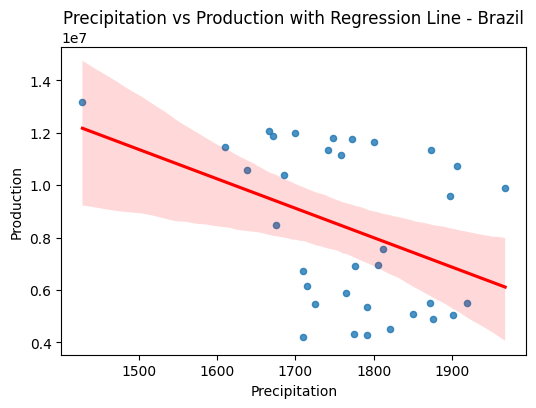

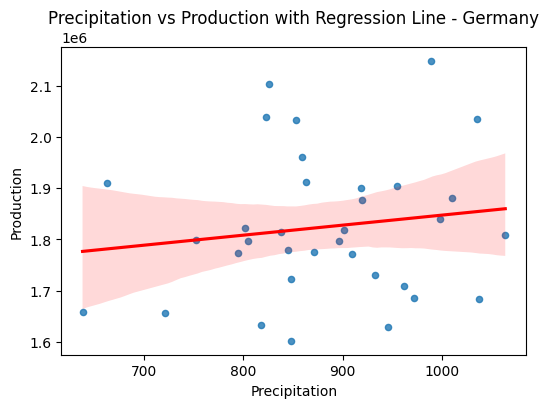

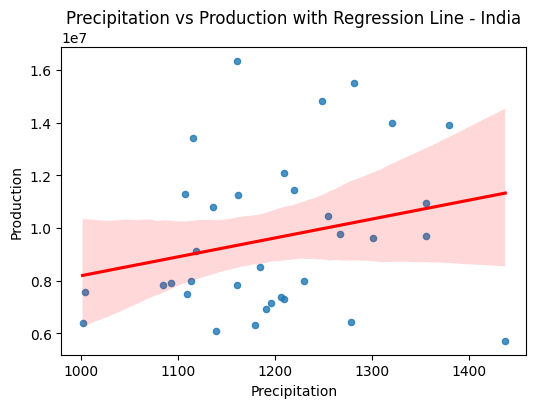

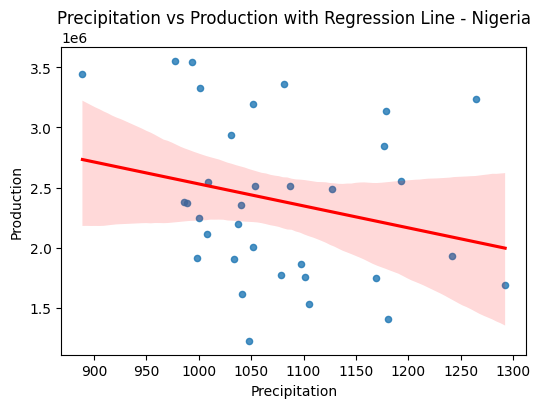

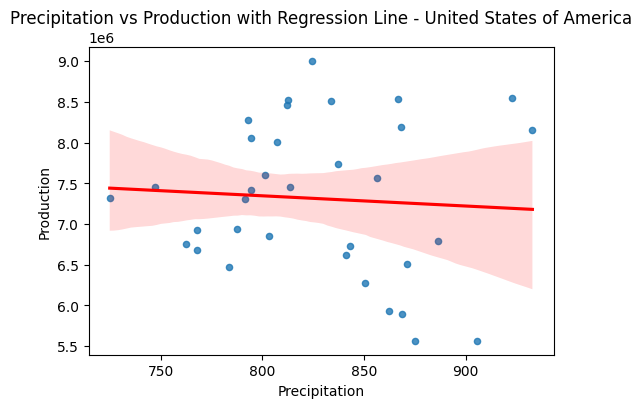

In [18]:
for country in countries:
    df_c = df_final[df_final['name'] == country].dropna(subset=['Precipitation', 'Production'])
    plt.figure(figsize=(6,4))
    sns.regplot(x='Precipitation', y='Production', data=df_c, scatter_kws={'s':20}, line_kws={"color":"red"})
    plt.title(f'Precipitation vs Production with Regression Line - {country}')
    plt.xlabel('Precipitation')
    plt.ylabel('Production')
    plt.show()


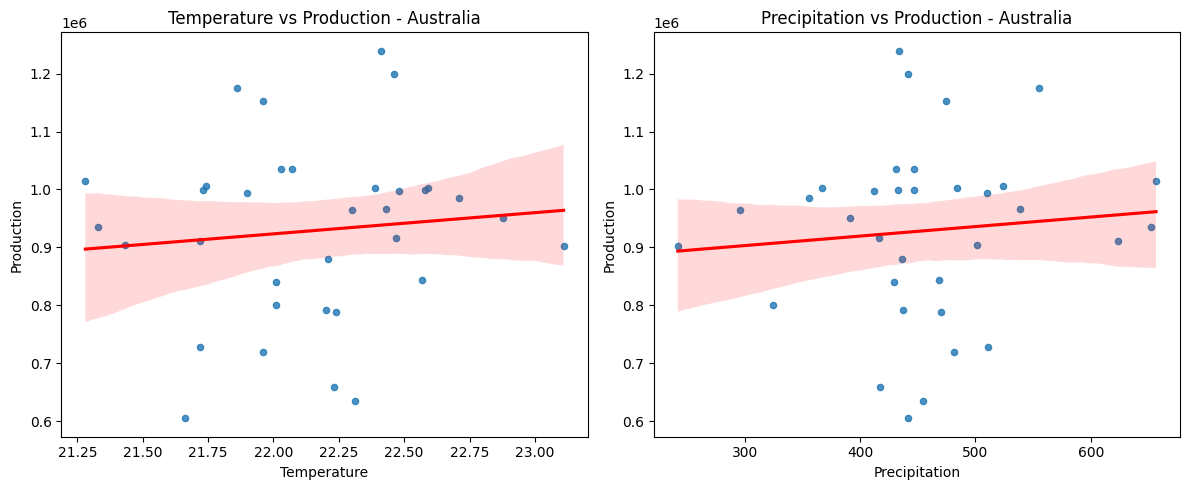

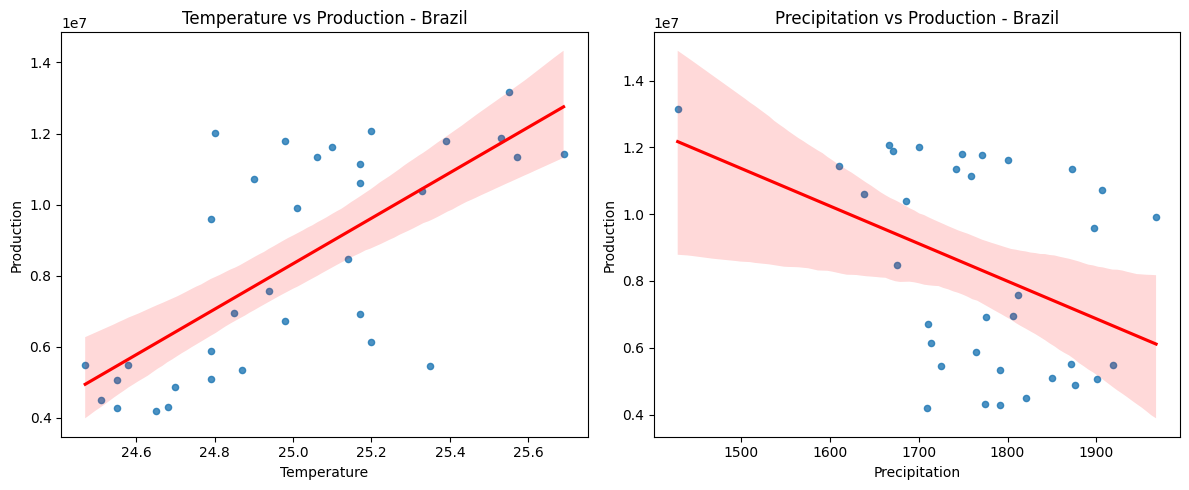

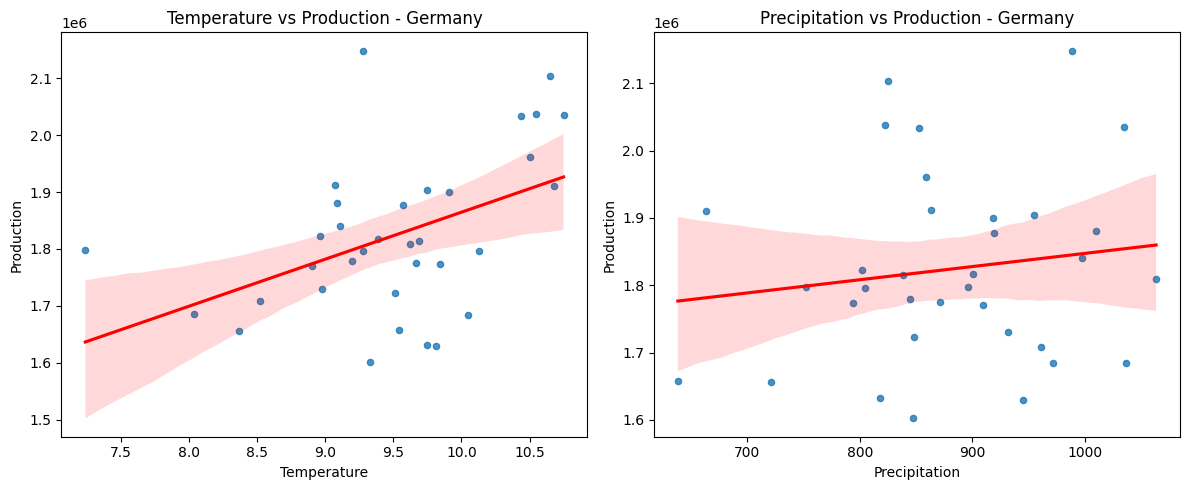

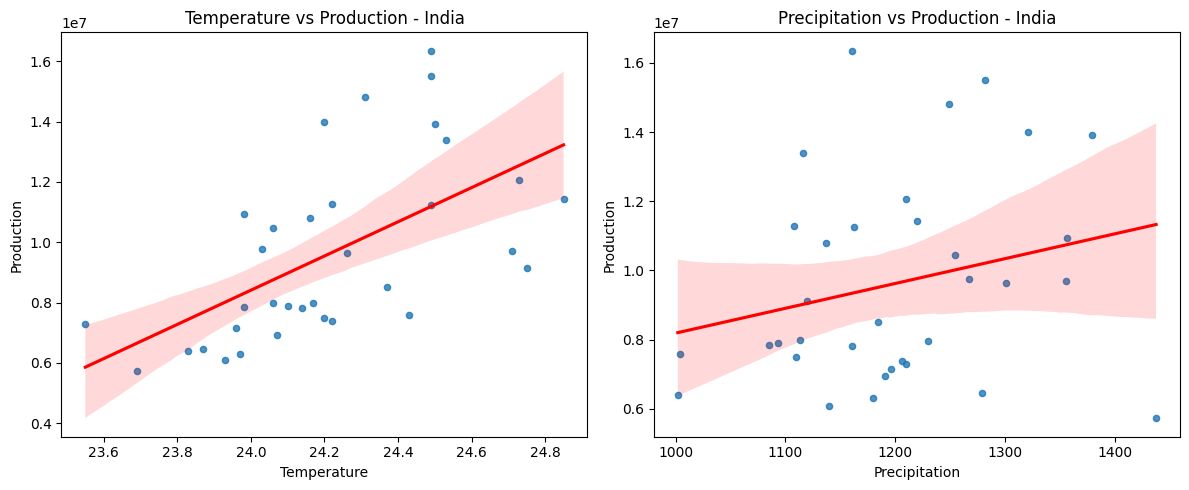

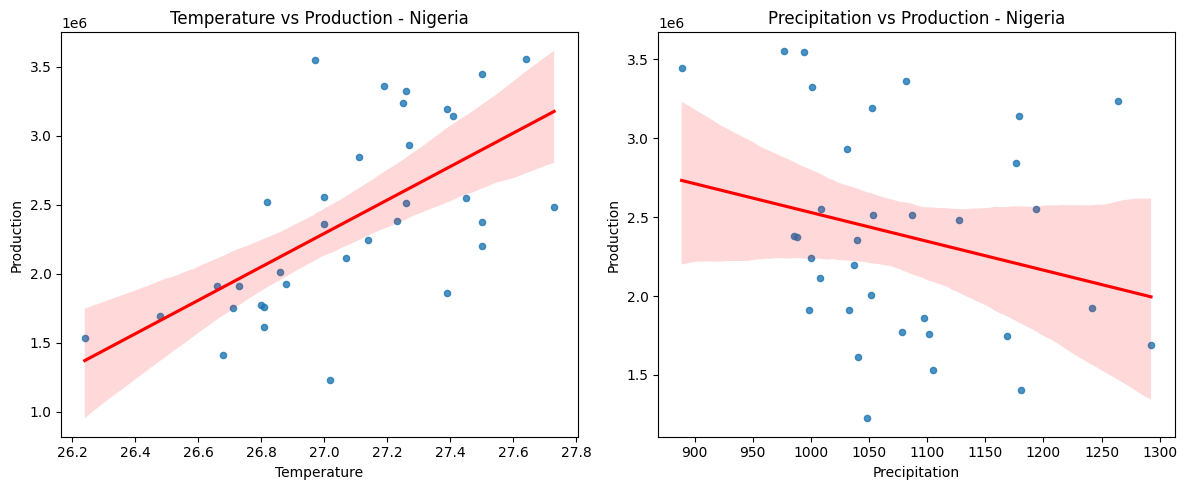

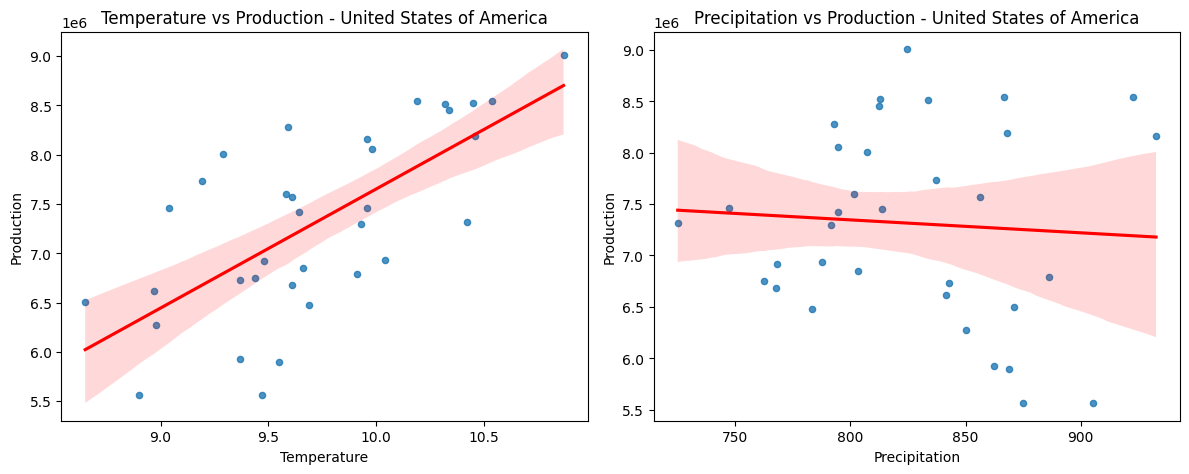

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

countries = ['Australia', 'Brazil', 'Germany', 'India', 'Nigeria', 'United States of America']

for country in countries:
    df_c = df_final[df_final['name'] == country].dropna(subset=['Temperature', 'Precipitation', 'Production'])

    plt.figure(figsize=(12,5))

    # Temperature vs Production
    plt.subplot(1, 2, 1)
    sns.regplot(x='Temperature', y='Production', data=df_c, scatter_kws={'s':20}, line_kws={"color":"red"})
    plt.title(f'Temperature vs Production - {country}')
    plt.xlabel('Temperature')
    plt.ylabel('Production')

    # Precipitation vs Production
    plt.subplot(1, 2, 2)
    sns.regplot(x='Precipitation', y='Production', data=df_c, scatter_kws={'s':20}, line_kws={"color":"red"})
    plt.title(f'Precipitation vs Production - {country}')
    plt.xlabel('Precipitation')
    plt.ylabel('Production')

    plt.tight_layout()
    plt.show()


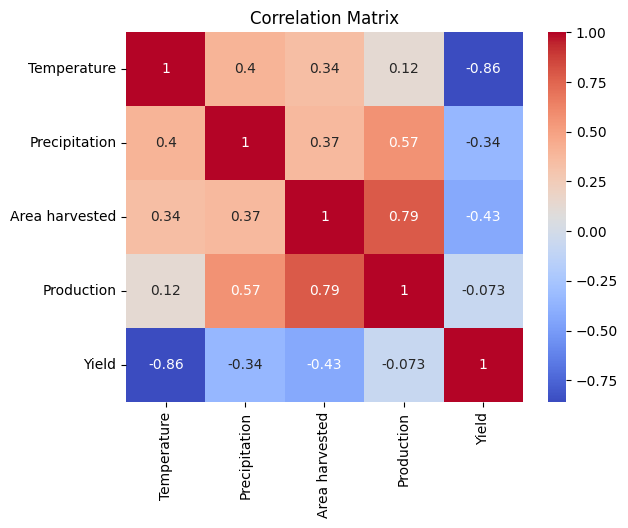

In [12]:
import seaborn as sns

cols = ['Temperature', 'Precipitation', 'Area harvested', 'Production', 'Yield']
corr = df_final[cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
